# Lectura y graficación de una señal almacenada en un archivo txt

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [82]:
f = open("ECG_reposo.txt","r")
g = open("ECG_sinrespirar1.txt","r")
h= open("ECG_reposo2.txt","r")
i = open("ECG_movimiento.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
raw_data2= h.read()
raw_data3= i.read()
raw_data4= g.read()
f.close()
h.close()
i.close()
g.close()

#raw_data

In [83]:
Fs = 1000
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [84]:
array_1 = np.genfromtxt("ECG_reposo.txt", delimiter="\t",skip_header = 4)
array_2=  np.genfromtxt("ECG_reposo2.txt", delimiter="\t",skip_header = 4)
array_3= np.genfromtxt("ECG_movimiento.txt", delimiter="\t",skip_header = 4)
array_4= np.genfromtxt("ECG_sinrespirar1.txt", delimiter="\t",skip_header = 4)

## Ploteamos la lectura

In [85]:
muestras=array[:,-2].shape

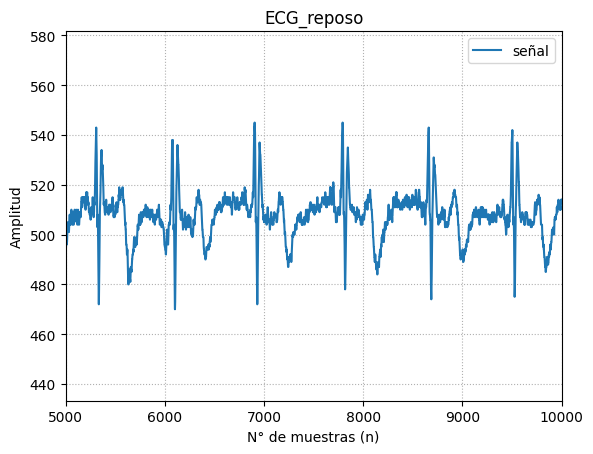

In [101]:

#Momento de reposo inicial
plt.plot(array_1[:,-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("N° de muestras (n)")
plt.ylabel("Amplitud")
plt.title("ECG_reposo")
plt.legend(loc="upper right")
plt.xlim([5000,10000])

plt.show()

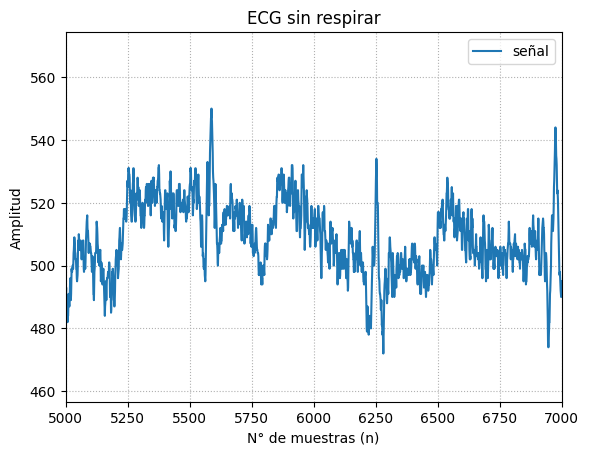

In [104]:
#Intervalo sin respiración por 5 segundos, 3 veces seguidas
plt.plot(array_4[:,-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("N° de muestras (n)")
plt.ylabel("Amplitud")
plt.title("ECG sin respirar")

plt.legend(loc="upper right")
plt.xlim([5000,7000])

plt.show()

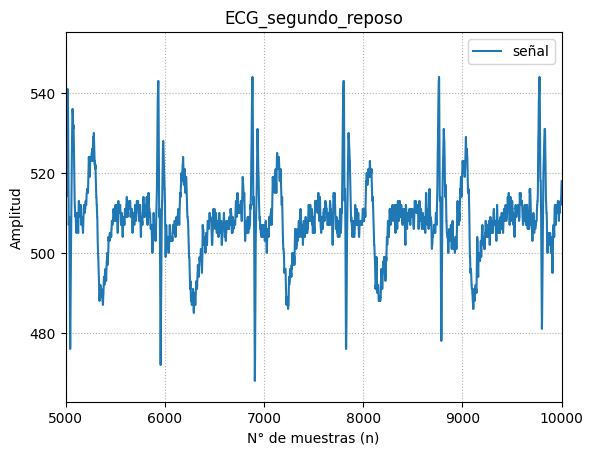

In [106]:
plt.plot(array_2[:,-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("N° de muestras (n)")
plt.ylabel("Amplitud")
plt.title("ECG_segundo_reposo")
plt.legend(loc="upper right")
plt.xlim([5000,10000])

plt.show()





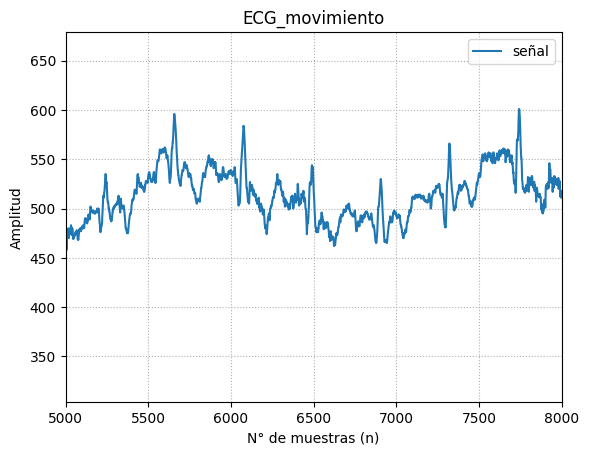

In [110]:
plt.plot(array_3[:,-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("N° de muestras (n)")
plt.ylabel("Amplitud")
plt.title("ECG_movimiento")
plt.legend(loc="upper right")
plt.xlim([5000,8000])

plt.show()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 3.5096e+01 3.5097e+01 3.5098e+01]


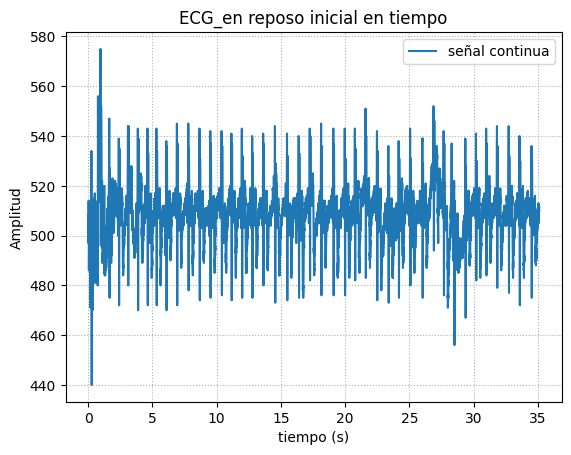

In [90]:

n=np.arange(0,len(array_1))
t_continuo=n*Ts
print(t_continuo)

#Plot de la señal continua

plt.plot(t_continuo,array_1[:,-2], label="señal continua")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("ECG_en reposo inicial en tiempo")
plt.legend(loc="upper right")
#plt.xlim([55,74])
plt.show()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 4.4696e+01 4.4697e+01 4.4698e+01]


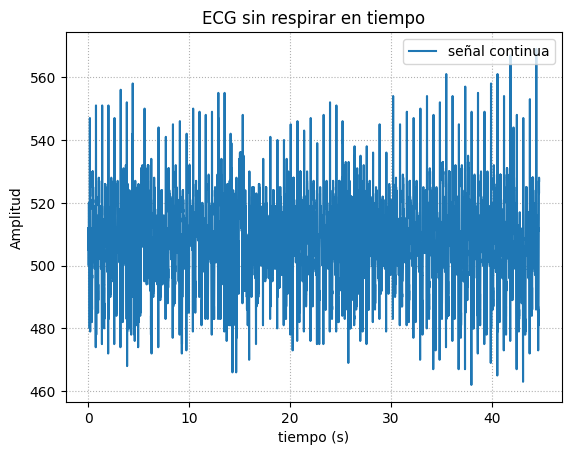

In [91]:
n=np.arange(0,len(array_4))
t_continuo=n*Ts
print(t_continuo)

#Plot de la señal continua

plt.plot(t_continuo,array_4[:,-2], label="señal continua")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("ECG sin respirar en tiempo")
plt.legend(loc="upper right")
#plt.xlim([55,74])
plt.show()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 5.4296e+01 5.4297e+01 5.4298e+01]


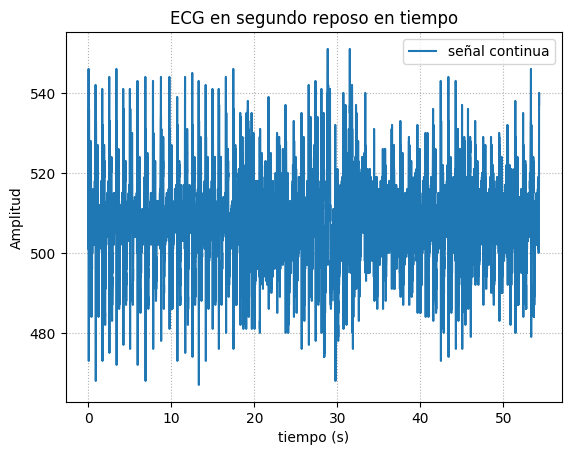

In [92]:
n=np.arange(0,len(array_2))
t_continuo=n*Ts
print(t_continuo)

#Plot de la señal continua

plt.plot(t_continuo,array_2[:,-2], label="señal continua")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("ECG en segundo reposo en tiempo")
plt.legend(loc="upper right")
#plt.xlim([55,74])
plt.show()

[0.0000e+00 1.0000e-03 2.0000e-03 ... 2.8796e+01 2.8797e+01 2.8798e+01]


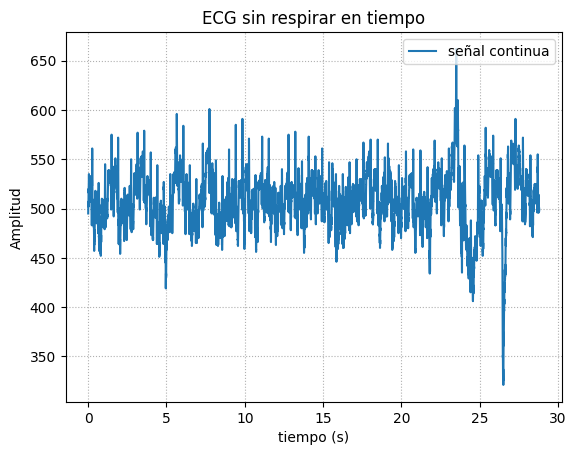

In [93]:
n=np.arange(0,len(array_3))
t_continuo=n*Ts
print(t_continuo)

#Plot de la señal continua

plt.plot(t_continuo,array_3[:,-2], label="señal continua")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title("ECG sin respirar en tiempo")
plt.legend(loc="upper right")
#plt.xlim([55,74])
plt.show()

## La forma de saber la frecuencia de la señal es viendo en el dominio de la frecuencia

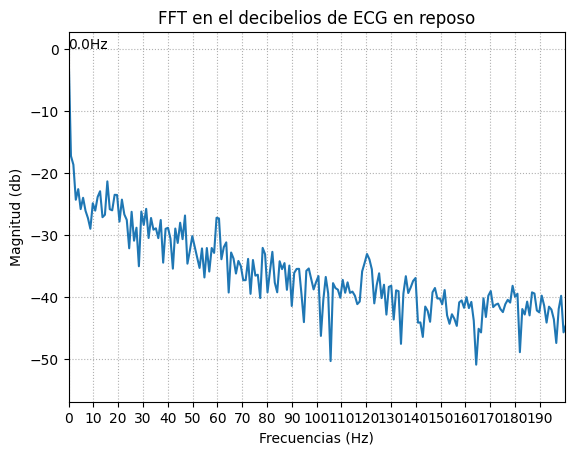

In [94]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array_1[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios de ECG en reposo")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()

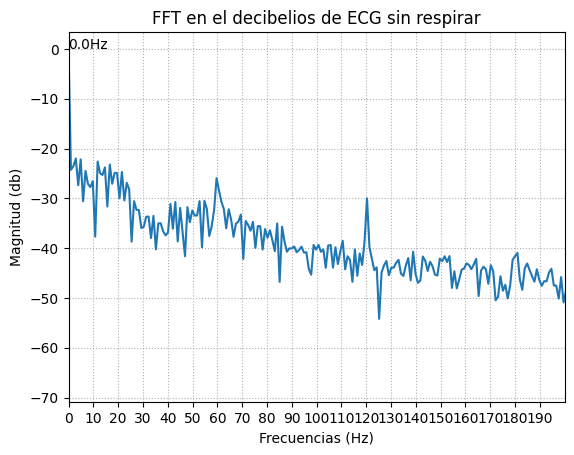

In [95]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array_4[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios de ECG sin respirar")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()

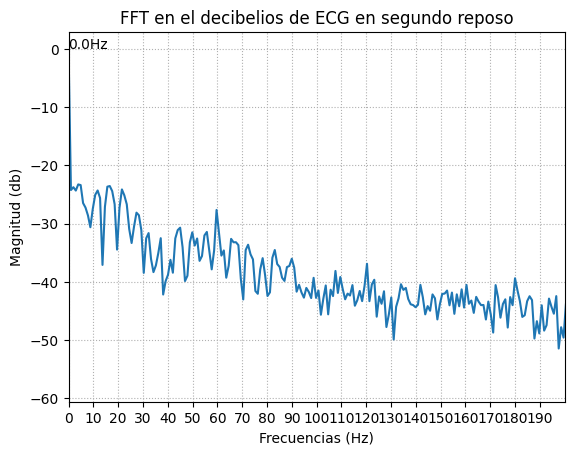

In [96]:

N = 2**10                                     # 10 bits, 0-1023

signal1 = array_2[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios de ECG en segundo reposo")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()

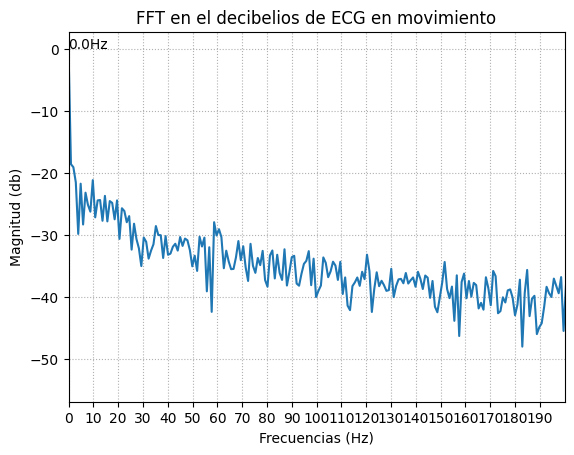

In [97]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array_3[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios de ECG en movimiento")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()